<a href="https://colab.research.google.com/github/ravindrajeet27/RESUME-projects/blob/main/Regression_Techneques_ridge_lasso_elasticnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multile Linear Regression with Regularization L1 and L2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [ ]:
# loading the data
car = pd.read_csv("/content/cars.csv")

In [ ]:
car.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
cars = car.iloc[:,[1,0,2,3,4]]
cars.columns

Index(['MPG', 'HP', 'VOL', 'SP', 'WT'], dtype='object')

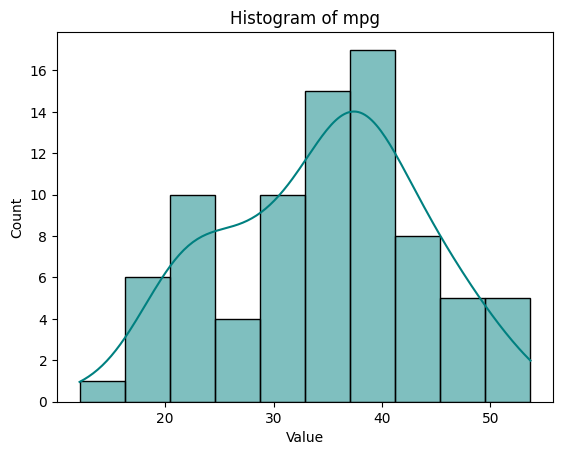

In [ ]:
sns.histplot(cars['MPG'], bins=10, kde=True, color='teal')
plt.title('Histogram of mpg')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [ ]:
cars.head()

,MPG,HP,VOL,SP,WT
0,53.700681,49,89,104.185353,28.762059
1,50.013401,55,92,105.461264,30.466833
2,50.013401,55,92,105.461264,30.193597
3,45.696322,70,92,113.461264,30.632114
4,50.504232,53,92,104.461264,29.889149


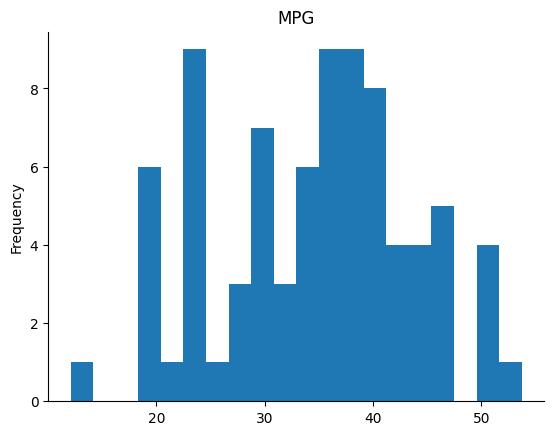

In [ ]:
# @title MPG

from matplotlib import pyplot as plt
cars['MPG'].plot(kind='hist', bins=20, title='MPG')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Correlation matrix
cars.corr()

,MPG,HP,VOL,SP,WT
MPG,1.000000,-0.725038,-0.529057,-0.687125,-0.526759
HP,-0.725038,1.000000,0.077459,0.973848,0.076513
VOL,-0.529057,0.077459,1.000000,0.102170,0.999203
SP,-0.687125,0.973848,0.102170,1.000000,0.102439
WT,-0.526759,0.076513,0.999203,0.102439,1.000000


In [ ]:
#EDA
cars.describe()

,MPG,HP,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,34.422076,117.469136,98.765432,121.540272,32.412577
std,9.131445,57.113502,22.301497,14.181432,7.492813
min,12.101263,49.000000,50.000000,99.564907,15.712859
25%,27.856252,84.000000,89.000000,113.829145,29.591768
50%,35.152727,100.000000,101.000000,118.208698,32.734518
75%,39.531633,140.000000,113.000000,126.404312,37.392524
max,53.700681,322.000000,160.000000,169.598513,52.997752


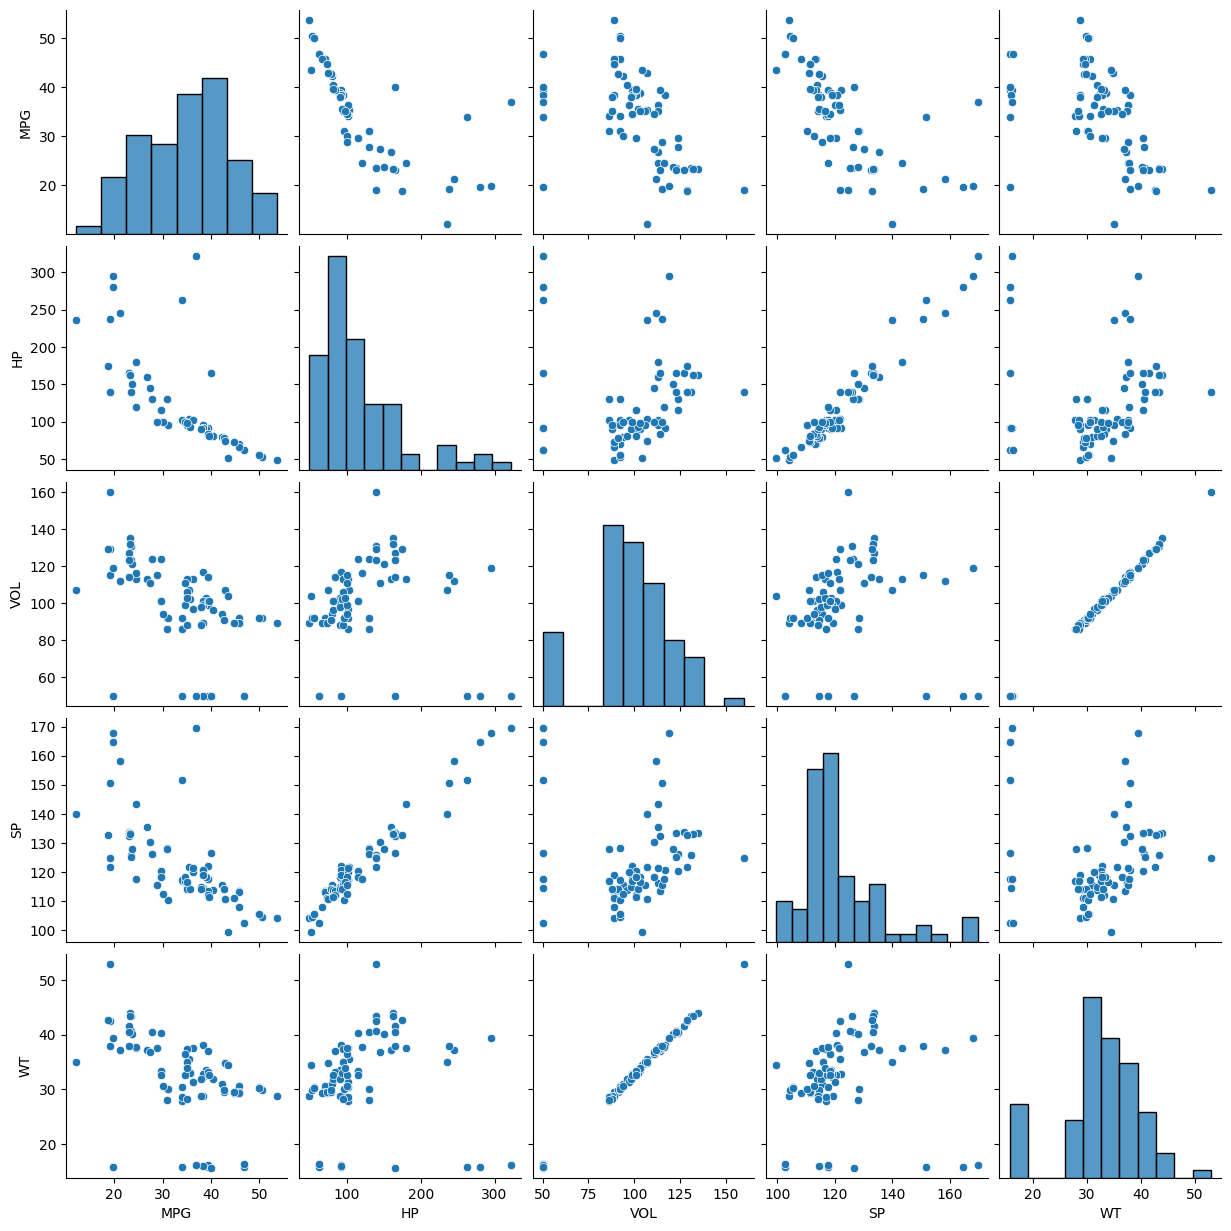

In [ ]:
sns.pairplot(cars)

In [ ]:
# Preparing the model on train data
model_train =  smf.ols("MPG ~ HP + VOL + SP + WT" ,data = cars).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           1.54e-23
Time:                        08:23:46   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Prediction
pred = model_train.predict(cars)
Errors = pred - cars.MPG
# RMSE value for data
rmse = np.sqrt(np.mean(Errors*Errors))
rmse

4.347084212704317

In [ ]:
# To overcome the issues, LASSO and RIDGE regression are used
################
###LASSO MODEL###
from sklearn.linear_model import Lasso
help(Lasso)

Help on class Lasso in module sklearn.linear_model._coordinate_descent:

class Lasso(ElasticNet)
 |  Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso).
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, default=1.0
 |      Constant that multiplies the L1 term, controlling regularization
 |      strength. `alpha` must be a non-negative float i.e. in `[0, inf)`.
 |  
 |      When `alpha = 0`, the objective is equivalent to ordinary least
 |      squares, solved by the :class:`LinearR

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.13))
lasso.fit(cars.iloc[:, 1:], cars.MPG)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.13))])

In [ ]:
# Coefficient values for all independent variables#
# Extract coefficients
coef = lasso.named_steps['lasso'].coef_

# Print them
for feature, c in zip(cars.iloc[:, 1:].columns, coef):
    print(f"{feature}: {c:.4f}")

HP: -6.6395
VOL: -4.2110
SP: 0.5305
WT: -0.0000


In [ ]:
pred_lasso = lasso.predict(cars.iloc[:, 1:])

In [ ]:
# Adjusted r-square
lasso.score(cars.iloc[:, 1:], car.MPG)

0.7538066945044887

In [ ]:
# RMSE
np.sqrt(np.mean((pred_lasso - car.MPG)**2))


4.502773470444787

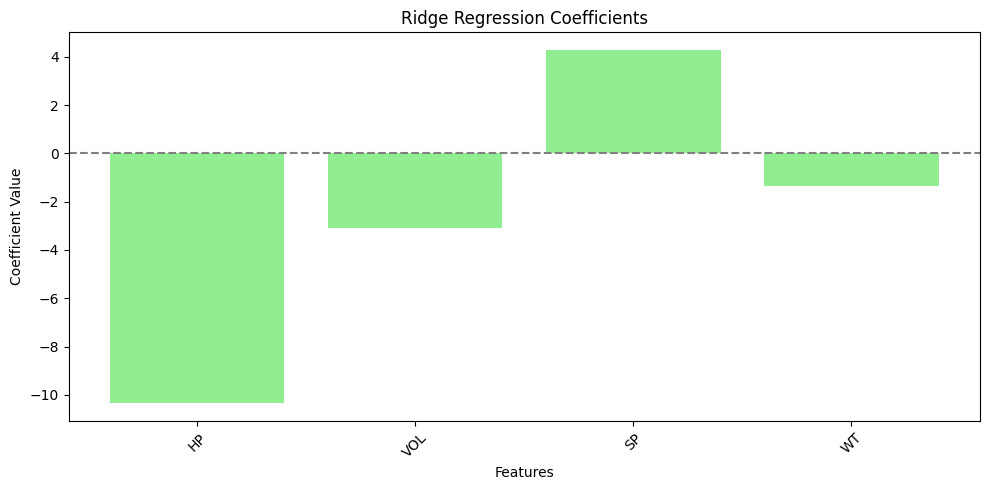

In [ ]:
from sklearn.linear_model import Ridge
# Create a Ridge model pipeline with scaling
ridge = make_pipeline(StandardScaler(), Ridge(alpha=0.4))  # alpha controls the strength

# Fit the model
ridge.fit(cars.iloc[:,1:], cars.MPG)

# Get the coefficients
ridge_coeff = pd.Series(ridge.named_steps['ridge'].coef_, index=cars.columns[1:])

# Plot them
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(x=ridge_coeff.index, height=ridge_coeff.values, color='lightgreen')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Ridge Regression Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
pred_rm = ridge.predict(cars.iloc[:, 1:])

In [ ]:
# Adjusted r-square
ridge.score(cars.iloc[:, 1:], car.MPG)

0.7689374101819391

In [ ]:

# RMSE
np.sqrt(np.mean((pred_rm - cars.MPG)**2))

4.362212293197451

Help on class ElasticNet in module sklearn.linear_model._coordinate_descent:

class ElasticNet(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
 |  
 |  Linear regression with combined L1 and L2 priors as regularizer.
 |  
 |  Minimizes the objective function::
 |  
 |          1 / (2 * n_samples) * ||y - Xw||^2_2
 |          + alpha * l1_ratio * ||w||_1
 |          + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
 |  
 |  If you are interested in controlling the L1 and L2 penalty
 |  separately, keep in mind that this is equivalent to::
 |  
 |          a * ||w||_1 + 0.5 * b * ||w||_2^2
 |  
 |  where::
 |  
 |          alpha = a + b and l1_ratio = a / (a + b)
 |  
 |  The parameter l1_ratio corresponds to alpha in the glmnet R package while
 |  alph

4.349987235318757

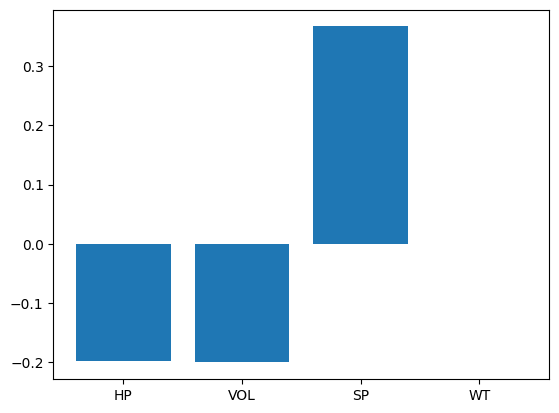

In [ ]:

### ELASTIC NET REGRESSION ###
from sklearn.linear_model import ElasticNet
help(ElasticNet)
enet = ElasticNet(alpha = 0.4)

enet.fit(cars.iloc[:, 1:], car.MPG)

# Coefficients values for all the independent vairbales
enet.coef_
enet.intercept_

plt.bar(height = pd.Series(enet.coef_), x = pd.Series(cars.columns[1:]))

enet.alpha

pred_enet = enet.predict(cars.iloc[:, 1:])

# Adjusted r-square
enet.score(cars.iloc[:, 1:], car.MPG)

# RMSE
np.sqrt(np.mean((pred_enet - cars.MPG)**2))


In [ ]:
# Lasso Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

lasso_reg = GridSearchCV(lasso, parameters, scoring = 'r2', cv = 5)
lasso_reg.fit(cars.iloc[:, 1:], cars.MPG)


lasso_reg.best_params_
lasso_reg.best_score_

lasso_pred = lasso_reg.predict(cars.iloc[:, 1:])

# Adjusted r-square#
lasso_reg.score(cars.iloc[:, 1:], car.MPG)

# RMSE
np.sqrt(np.mean((lasso_pred - cars.MPG)**2))



# Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

ridge_reg = GridSearchCV(ridge, parameters, scoring = 'r2', cv = 5)
ridge_reg.fit(cars.iloc[:, 1:], car.MPG)

ridge_reg.best_params_
ridge_reg.best_score_

ridge_pred = ridge_reg.predict(cars.iloc[:, 1:])






/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.475e+02, tolerance: 3.523e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.236e+02, tolerance: 6.125e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.936e+02, tolerance: 6.587e

4.348420101988157

In [ ]:
# Adjusted r-square#
ridge_reg.score(cars.iloc[:, 1:], cars.MPG)

0.7703962210751647

In [ ]:
# RMSE
np.sqrt(np.mean((ridge_pred - cars.MPG)**2))

4.348420101988157

In [ ]:
# ElasticNet Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

enet = ElasticNet()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

enet_reg = GridSearchCV(enet, parameters, scoring = 'neg_mean_squared_error', cv = 5)
enet_reg.fit(cars.iloc[:, 1:], cars.MPG)

enet_reg.best_params_
enet_reg.best_score_

enet_pred = enet_reg.predict(cars.iloc[:, 1:])

# ElasticNet Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

enet = ElasticNet()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5 ,10, 20]}

enet_reg = GridSearchCV(enet, parameters, scoring = 'neg_mean_squared_error', cv = 5)
enet_reg.fit(car.iloc[:, 1:], car.MPG)

enet_reg.best_params_
enet_reg.best_score_

enet_pred = enet_reg.predict(car.iloc[:, 1:])

# Adjusted r-square
enet_reg.score(car.iloc[:, 1:], car.MPG)

# RMSE
np.sqrt(np.mean((enet_pred - car.MPG)**2))



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.475e+02, tolerance: 3.523e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.236e+02, tolerance: 6.125e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.936e+02, tolerance: 6.587e

2.7702618170026246e-15

In [ ]:
# Adjusted r-square
enet_reg.score(car.iloc[:, 1:], car.MPG)


-7.674350534742683e-30

In [ ]:
# RMSE
np.sqrt(np.mean((enet_pred - car.MPG)**2))

2.7702618170026246e-15